# Analyse des notes des arrondissements

importations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
from scipy.stats import f_oneway
import statsmodels.api as sm
import geopandas as gpd
import matplotlib.patches as patches

### Chargement des données

In [2]:
data = pd.read_csv('../../data/arrondissements_notes.csv',delimiter=',')
data

,Critere,Paris 1er,Paris 2e,Paris 3e,Paris 4e,Paris 5e,Paris 6e,Paris 7e,Paris 8e,Paris 9e,...,Paris 11e,Paris 12e,Paris 13e,Paris 14e,Paris 15e,Paris 16e,Paris 17e,Paris 18e,Paris 19e,Paris 20e
0,Environnement,4.50,3.20,5.52,4.43,7.45,6.25,7.11,6.29,5.72,...,5.35,6.70,5.41,4.83,6.29,7.28,6.11,3.63,5.32,5.27
1,Transports,9.33,8.08,8.19,7.57,8.55,8.60,7.67,8.67,8.58,...,8.28,8.32,8.15,7.44,8.27,7.33,7.49,7.17,7.56,7.68
2,Sécurité,5.25,6.32,7.93,6.68,8.27,7.90,8.00,7.71,6.79,...,5.84,6.45,5.46,5.38,7.04,7.84,6.73,3.94,4.46,5.53
3,Santé,6.50,7.36,7.93,6.46,8.57,8.10,6.93,7.29,7.70,...,7.42,7.97,7.69,7.44,8.23,7.47,7.28,6.20,6.99,6.96
4,Sports et loisirs,6.00,4.76,6.78,5.21,7.18,5.90,5.81,5.19,6.43,...,6.52,7.31,7.16,6.56,7.41,6.60,6.68,5.74,6.97,6.58
5,Culture,8.58,8.00,9.33,7.57,8.63,8.40,7.44,7.19,8.64,...,7.00,6.80,6.77,6.55,6.77,6.56,6.71,5.97,6.95,6.57
6,Enseignement,6.17,5.68,7.81,7.18,9.10,8.55,7.59,7.38,7.55,...,6.57,7.13,6.72,5.91,7.27,7.94,7.14,5.26,5.54,6.20
7,Commerces,8.25,8.52,8.81,6.86,8.43,8.20,6.96,7.24,8.70,...,7.80,7.87,7.66,7.61,8.48,6.89,7.86,6.86,6.81,7.39
8,Qualité de vie,6.33,5.92,7.52,5.86,8.63,7.55,7.74,7.33,7.70,...,6.85,7.41,6.39,6.06,7.63,7.33,7.46,4.86,5.79,6.34


### Affichage des tendances globales

In [3]:
data_stats = data.describe()
data_stats

,Paris 1er,Paris 2e,Paris 3e,Paris 4e,Paris 5e,Paris 6e,Paris 7e,Paris 8e,Paris 9e,Paris 10e,Paris 11e,Paris 12e,Paris 13e,Paris 14e,Paris 15e,Paris 16e,Paris 17e,Paris 18e,Paris 19e,Paris 20e
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,6.767778,6.426667,7.757778,6.424444,8.312222,7.716667,7.250000,7.143333,7.534444,5.540000,6.847778,7.328889,6.823333,6.420000,7.487778,7.248889,7.051111,5.514444,6.265556,6.502222
std,1.608678,1.749171,1.109513,1.073721,0.610999,0.989634,0.652917,0.956517,1.048524,1.403006,0.918705,0.630505,0.960599,0.970361,0.739202,0.489194,0.538202,1.214641,1.022755,0.788730
min,4.500000,3.200000,5.520000,4.430000,7.180000,5.900000,5.810000,5.190000,5.720000,3.310000,5.350000,6.450000,5.410000,4.830000,6.290000,6.560000,6.110000,3.630000,4.460000,5.270000
25%,6.000000,5.680000,7.520000,5.860000,8.270000,7.550000,6.960000,7.190000,6.790000,4.600000,6.520000,6.800000,6.390000,5.910000,7.040000,6.890000,6.710000,4.860000,5.540000,6.200000
50%,6.330000,6.320000,7.930000,6.680000,8.550000,8.100000,7.440000,7.290000,7.700000,5.740000,6.850000,7.310000,6.770000,6.550000,7.410000,7.330000,7.140000,5.740000,6.810000,6.570000
75%,8.250000,8.000000,8.190000,7.180000,8.630000,8.400000,7.670000,7.380000,8.580000,6.530000,7.420000,7.870000,7.660000,7.440000,8.230000,7.470000,7.460000,6.200000,6.970000,6.960000
max,9.330000,8.520000,9.330000,7.570000,9.100000,8.600000,8.000000,8.670000,8.700000,7.660000,8.280000,8.320000,8.150000,7.610000,8.480000,7.940000,7.860000,7.170000,7.560000,7.680000


### Classement des quartiers en fonction de leur sécurité

In [4]:
means = data.iloc[2, 1:].round(2)

ranked_means = means.sort_values(ascending=False)

ranked_df = ranked_means.reset_index()
ranked_df.columns = ['Arrondissement', 'Sécurité']

ranked_df

,Arrondissement,Sécurité
0,Paris 5e,8.27
1,Paris 7e,8.0
2,Paris 3e,7.93
3,Paris 6e,7.9
4,Paris 16e,7.84
5,Paris 8e,7.71
6,Paris 15e,7.04
7,Paris 9e,6.79
8,Paris 17e,6.73
9,Paris 4e,6.68


### Classement des quartiers en fonction de leurs acces aux commerces

In [39]:
means = data.iloc[7, 1:].round(2)

ranked_means = means.sort_values(ascending=False)

ranked_df = ranked_means.reset_index()
ranked_df.columns = ['Arrondissement', 'Commerces']

ranked_df

,Arrondissement,Commerces
0,Paris 3e,8.81
1,Paris 9e,8.7
2,Paris 2e,8.52
3,Paris 15e,8.48
4,Paris 5e,8.43
5,Paris 1er,8.25
6,Paris 6e,8.2
7,Paris 12e,7.87
8,Paris 17e,7.86
9,Paris 11e,7.8


### Chargement des données des appartements parisiens

In [6]:
data_rent = pd.read_csv('../../data/rent_full.csv',delimiter=';')
data_rent

,list_id,type,first_publication_date,zipcode,district_id,price,charges_included,furnished,surface,price_m2,...,specificities_Gardien,specificities_Grenier,specificities_Habitation à Loyer Modéré,specificities_Interphone,specificities_Plusieurs toilettes,specificities_Sous-sol,outside_access_Balcon,outside_access_Jardin,outside_access_Piscine,outside_access_Terrasse
0,2974157333,Appartement,2025-04-18 09:52:00,75020,75120.0,500.0,1,1.0,11.0,45.454545,...,False,False,False,False,False,False,False,False,False,False
1,2988292257,Appartement,2025-05-12 09:04:16,75116,3001493.0,500.0,1,1.0,10.0,50.000000,...,False,False,False,False,False,False,False,False,False,False
2,2985778111,Appartement,2025-05-08 00:20:16,75012,3000244.0,500.0,1,1.0,15.0,33.333333,...,False,False,False,False,False,False,False,False,False,False
3,2978434984,Appartement,2025-04-25 18:06:54,75015,3000135.0,500.0,1,1.0,10.0,50.000000,...,1.0,False,False,1.0,False,False,False,False,False,False
4,2974514305,Appartement,2025-04-19 07:40:53,75019,75119.0,500.0,1,1.0,18.0,27.777778,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,2915282484,Appartement,2025-01-07 19:54:12,75017,3000193.0,1500.0,1,1.0,30.0,50.000000,...,NaN,False,NaN,NaN,False,False,False,False,NaN,False
3122,2915239385,Appartement,2025-01-07 18:36:38,75010,100517.0,1500.0,1,1.0,45.0,33.333333,...,NaN,False,NaN,NaN,False,False,False,False,NaN,False
3123,2911754446,Appartement,2025-01-01 20:54:27,75018,100465.0,1500.0,1,1.0,27.0,55.555556,...,NaN,False,NaN,NaN,False,False,False,False,NaN,False
3124,2908358055,Appartement,2024-12-25 16:02:00,75016,100478.0,1500.0,1,1.0,26.0,57.692308,...,NaN,False,NaN,NaN,False,False,False,False,NaN,1.0


### Création de la table des points d'intérêts

In [7]:
# 2721    -> furniture_store
# 1557    -> laundry
# 2711    -> bakery
# 2352    -> cafe
# 4101    -> home_goods_store
# 5423    -> clothing_store
# 1105    -> atm
# 4401    -> lodging
# 556     -> night_club
# 842     -> convenience_store
# 6914    -> restaurant
# 4888    -> bar

def load_poi(listpoi,fn='../../data/poi-paris.pkl'):
    """ Dictionaire POI, clé : type de POI, valeur : dictionnaire des POIs de ce type : (id_POI, [coordonnées, note, nom, type, prix])
    
    Liste des POIs : furniture_store, laundry, bakery, cafe, home_goods_store, 
    clothing_store, atm, lo.lip6.fr/dging, night_club, convenience_store, restaurant, bar
    """
    # all_data = []
    all_data = {}
    poidata = pickle.load(open(fn, "rb"))
    for typepoi in listpoi:
        data = [ tuple([v[1][0][0],v[1][0][1]]) for v in sorted(poidata[typepoi].items())[:1105] ]
        # print(len(data))
        # all_data.append(data)
        all_data[typepoi] = data
    return all_data

liste_batiments = ['atm','laundry','bakery','cafe','home_goods_store','clothing_store']



data_poi = load_poi(liste_batiments)
# data_poi = np.array(data_poi).T



# Create a DataFrame from the data_poi array
df_poi = pd.DataFrame(data_poi, columns=liste_batiments)
df_poi
# data_poi
# print(data_poi.shape)

,atm,laundry,bakery,cafe,home_goods_store,clothing_store
0,"(48.80813809999999, 2.3330815)","(48.80781379999999, 2.3885921)","(48.8476645, 2.3261083)","(48.8738885, 2.3310899)","(48.8534987, 2.3829069)","(48.90771520000001, 2.2871671)"
1,"(48.8274197, 2.2797686)","(48.83961439999999, 2.3515031)","(48.8682995, 2.4016127)","(48.84699579999999, 2.307088499999999)","(48.9037212, 2.317038)","(48.84529999999999, 2.4047004)"
2,"(48.8780547, 2.3184888)","(48.8943516, 2.2664952)","(48.8776962, 2.293429600000001)","(48.8538176, 2.3277364)","(48.8145793, 2.3176571)","(48.890763, 2.2373349)"
3,"(48.8515525, 2.3746121)","(48.87679720000001, 2.3528799)","(48.8448822, 2.4055874)","(48.89197249999999, 2.2349349)","(48.8473045, 2.370535)","(48.8383157, 2.3458186)"
4,"(48.8568259, 2.2647417)","(48.87616140000001, 2.3398171)","(48.83672979999999, 2.3502429)","(48.81492, 2.40201)","(48.8439291, 2.2930896)","(48.87503969999999, 2.3249374)"
...,...,...,...,...,...,...
1100,"(48.8271357, 2.242546099999999)","(48.9146611, 2.3848754)","(48.88998290000001, 2.377344700000001)","(48.8709386, 2.3117939)","(48.8949193, 2.3449998)","(48.84837839999999, 2.2823057)"
1101,"(48.8593358, 2.375358099999999)","(48.8683256, 2.3725591)","(48.868514, 2.2907284)","(48.83836279999999, 2.3930824)","(48.88128199999999, 2.47224)","(48.9072087, 2.2477519)"
1102,"(48.8542962, 2.269114)","(48.89028949999999, 2.3267265)","(48.8497059, 2.324904)","(48.8795849, 2.294037)","(48.8184602, 2.3800321)","(48.8907849, 2.2379647)"
1103,"(48.8310203, 2.2342977)","(48.84766219999999, 2.3995792)","(48.81444800000001, 2.4154741)","(48.83444670000001, 2.374872700000001)","(48.8663673, 2.3311991)","(48.8645218, 2.3316287)"


### Calcul du nombre de poi par logement (dist < 500 m)

Je dois calculer le nombre de poi près d'un appartement à moins de 500 m  
j'ai un tableau d'appartements de la sorte  

| latitude | longitude | 
|:-----------:|:-----------:|
|     48      |    2       |           
|     48      |     2      |           
|       48    |     2      |           
  
j'ai un tableau de poi de la sorte ou chaque tube est (lat,lon)  

| restaurants | magasins | 
|:-----------:|:-----------:|
|     (48,2)   |    (48,2)       |           
|     (48,2)      |     (48,2)     |           
|       (48,2)    |     (48,2)     |  

je dois avoir un tableau finale de la forme 

| latitude | longitude | nb_restaurants|nb_magasins|
|:-----------:|:-----------:|:-----------:|:-----------:|
|     48      |    2       |  12         |5|
|     48      |     2      |     3      |45|
|       48    |     2      | 5|6|

In [8]:
import pandas as pd
import numpy as np

# Fonction pour calculer la distance géographique (Haversine)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Rayon de la Terre en mètres
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Exemple de données pour les appartements
# appartements = pd.DataFrame({
#     'latitude': [48, 48, 48],
#     'longitude': [2, 2, 2]
# })

# Exemple de données pour les POI
# poi = pd.DataFrame({
#     'restaurants': [(48.001, 2.001), (48.002, 2.002), (48.003, 2.003)],
#     'magasins': [(48.004, 2.004), (48.005, 2.005), (48.006, 2.006)]
# })

# Initialiser les colonnes pour les résultats
# data_rent['nb_restaurants'] = 0
# data_rent['nb_magasins'] = 0

columns = df_poi.columns
for column in columns:
    data_rent[column] = 0

# Calculer le nombre de POI proches pour chaque appartement
for index, appartement in data_rent.iterrows():
    lat_a, lon_a = appartement['latitude'], appartement['longitude']
    
    for col in columns:
        # Compter les restaurants proches
        count_restaurants = sum(
            haversine(lat_a, lon_a, lat_p, lon_p) <= 500
            for lat_p, lon_p in df_poi[col]
        )
        data_rent.at[index, col] = count_restaurants
    

# Résultat final
data_rent

,list_id,type,first_publication_date,zipcode,district_id,price,charges_included,furnished,surface,price_m2,...,outside_access_Balcon,outside_access_Jardin,outside_access_Piscine,outside_access_Terrasse,atm,laundry,bakery,cafe,home_goods_store,clothing_store
0,2974157333,Appartement,2025-04-18 09:52:00,75020,75120.0,500.0,1,1.0,11.0,45.454545,...,False,False,False,False,5,7,5,15,7,3
1,2988292257,Appartement,2025-05-12 09:04:16,75116,3001493.0,500.0,1,1.0,10.0,50.000000,...,False,False,False,False,14,12,7,10,8,17
2,2985778111,Appartement,2025-05-08 00:20:16,75012,3000244.0,500.0,1,1.0,15.0,33.333333,...,False,False,False,False,7,4,5,12,18,7
3,2978434984,Appartement,2025-04-25 18:06:54,75015,3000135.0,500.0,1,1.0,10.0,50.000000,...,False,False,False,False,7,8,4,8,4,3
4,2974514305,Appartement,2025-04-19 07:40:53,75019,75119.0,500.0,1,1.0,18.0,27.777778,...,False,False,False,False,6,10,9,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,2915282484,Appartement,2025-01-07 19:54:12,75017,3000193.0,1500.0,1,1.0,30.0,50.000000,...,False,False,NaN,False,11,14,8,10,8,13
3122,2915239385,Appartement,2025-01-07 18:36:38,75010,100517.0,1500.0,1,1.0,45.0,33.333333,...,False,False,NaN,False,12,11,7,17,10,5
3123,2911754446,Appartement,2025-01-01 20:54:27,75018,100465.0,1500.0,1,1.0,27.0,55.555556,...,False,False,NaN,False,8,8,17,23,20,22
3124,2908358055,Appartement,2024-12-25 16:02:00,75016,100478.0,1500.0,1,1.0,26.0,57.692308,...,False,False,NaN,1.0,13,7,9,5,13,21


### Affichage `total_poi`  avec les données filtrées à prix < 1500

In [9]:
data_rent['total_poi'] = data_rent[columns].sum(axis=1)
data_rent=data_rent[data_rent['price'] < 1500]


### Fusion des tables `data_stats` et `data_rent`
- Pour avoir une note de l'arrondissement dans lequel chaque appartement se trouve par appartement  

In [61]:
data_arr = data_stats.iloc[[1]].round(2)
# Transformation : convertir les colonnes en lignes
data_arr = data_arr.melt(var_name='arr', value_name='note_arr')

zipcode_to_arrondissement = {}

nbase = "750{:02d}"

for i in range(1,21):
    nb = nbase.format(i)
    if i == 1:
        nom = 'Paris 1er'
    else:
        nom = f'Paris {i}e'

    zipcode_to_arrondissement[int(nb)] = nom


data_rent['arr'] = data_rent['zipcode'].map(zipcode_to_arrondissement)

data_rent = data_rent.dropna(subset=['arr'])
# Jointure des deux tables
data_rent_merged = pd.merge(data_rent, data_arr, on='arr', how='left')

# data_rent = data_rent.rename(columns={'note_x': 'moyenne_arr'})
# data_rent = data_rent.drop('note_y',axis=1)
data_rent_merged

,list_id,type,first_publication_date,zipcode,district_id,price,charges_included,furnished,surface,price_m2,...,outside_access_Terrasse,atm,laundry,bakery,cafe,home_goods_store,clothing_store,total_poi,arr,note_arr
0,2974157333,Appartement,2025-04-18 09:52:00,75020,75120.0,500.0,1,1.0,11.0,45.454545,...,False,5,7,5,15,7,3,42,Paris 20e,6.50
1,2985778111,Appartement,2025-05-08 00:20:16,75012,3000244.0,500.0,1,1.0,15.0,33.333333,...,False,7,4,5,12,18,7,53,Paris 12e,7.33
2,2978434984,Appartement,2025-04-25 18:06:54,75015,3000135.0,500.0,1,1.0,10.0,50.000000,...,False,7,8,4,8,4,3,34,Paris 15e,7.49
3,2974514305,Appartement,2025-04-19 07:40:53,75019,75119.0,500.0,1,1.0,18.0,27.777778,...,False,6,10,9,5,4,2,36,Paris 19e,6.27
4,2957747203,Appartement,2025-03-22 12:00:28,75010,100520.0,500.0,1,1.0,20.0,25.000000,...,False,4,6,7,8,5,5,35,Paris 10e,5.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,2926176685,Appartement,2025-01-26 22:10:30,75018,100463.0,1494.0,1,1.0,43.0,34.744186,...,False,7,17,14,19,9,17,83,Paris 18e,5.51
2267,2923216774,Appartement,2025-01-21 22:37:27,75018,100465.0,1495.0,1,1.0,35.0,42.714286,...,False,7,11,15,20,14,22,89,Paris 18e,5.51
2268,2926037463,Appartement,2025-01-26 18:27:12,75018,100463.0,1495.0,1,1.0,42.0,35.595238,...,False,7,15,13,16,14,23,88,Paris 18e,5.51
2269,2934394775,Appartement,2025-02-10 16:55:49,75010,3000217.0,1496.0,1,1.0,69.0,21.681159,...,False,9,11,3,23,6,8,60,Paris 10e,5.54


### Régression linéaire

In [12]:
X = data_rent_merged[['note_arr']]  
X = sm.add_constant(X)  
y = data_rent_merged['price']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2892
Date:                Thu, 15 May 2025   Prob (F-statistic):              0.591
Time:                        01:33:19   Log-Likelihood:                -15735.
No. Observations:                2271   AIC:                         3.147e+04
Df Residuals:                    2269   BIC:                         3.148e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1073.4279     48.462     22.150      0.0

On remarque que la note seule n'explique pas la totalité de la variation du prix mais elle tend à le faire augmenter de 101€ en moyenne pour chaque points de plus

## Génération et affichage des cartes montrant la qualité des arrondissements

### Carte sur la moyenne des notes des arrondissements

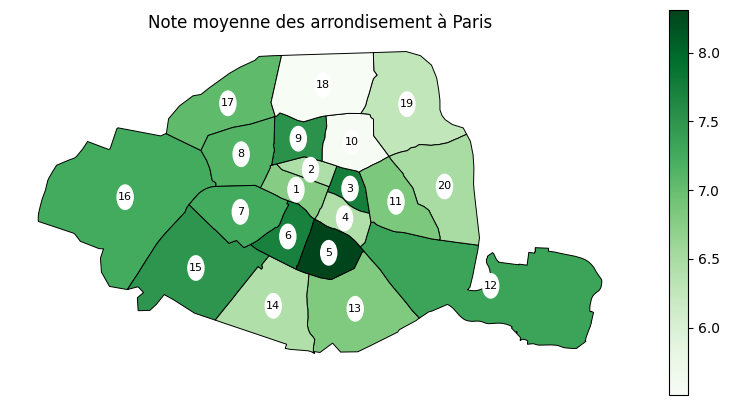

In [ ]:
# Fusion
# Charger le fichier GeoJSON des arrondissements
gdf = gpd.read_file('../../data/arrondissements.geojson')

data_moyenne = data_stats.iloc[1, 0:].round(2)
# data_moy = data_moyenne.drop('Critere',axis=1)
# Exemple : Renommer plusieurs colonnes
data_melted0 = data_moyenne.reset_index().rename(columns={
    'index': 'c_ar',
    'mean': 'note'
})

# Ensure 'c_ar' is converted to string before applying .str.extract()
data_melted0['c_ar'] = data_melted0['c_ar'].astype(str).str.extract(r'(\d+)').astype(int)
# Transformation : convertir les colonnes en lignes
# data_melted0 = data_moy.melt(var_name='c_ar', value_name='note')
# data_melted0
# Extraire le numéro d'arrondissement (1, 2, 3, ...) à partir du nom
# data_melted0['c_ar'] = data_melted0['c_ar'].str.extract(r'(\d+)').astype(int)

gdf_merged = gdf.merge(data_melted0, on='c_ar')

fig, ax = plt.subplots(figsize=(10, 5))
gdf_merged.plot(column='note', cmap='Greens', linewidth=0.7, edgecolor='black', legend=True, ax=ax)

for idx, row in gdf_merged.iterrows():
    # Calculer le centre du polygone pour placer le numéro
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y

    # Ajouter un cercle en arrière-plan
    circle = patches.Circle((x, y), radius=0.0035, color='white', zorder=1)  # Ajustez le rayon si nécessaire
    ax.add_patch(circle)

    # Ajouter le numéro de l'arrondissement
    ax.annotate(text=row['c_ar'], xy=(x, y), ha='center', va='center', fontsize=8, color='black', zorder=3)

plt.title('Note moyenne des arrondisement à Paris')
plt.axis('off')
# plt.savefig("../../images/generale.png",transparent=True, dpi=300)
plt.show()



#### Classement des arrondissements en fonction de leurs note moyenne

In [58]:
means_gen = data_stats.iloc[1, 0:].round(2)

ranked_means = means_gen.sort_values(ascending=False)

ranked_df = ranked_means.reset_index()
ranked_df.columns = ['Arrondissement', 'note']

print(ranked_df)

   Arrondissement  note
0        Paris 5e  8.31
1        Paris 3e  7.76
2        Paris 6e  7.72
3        Paris 9e  7.53
4       Paris 15e  7.49
5       Paris 12e  7.33
6        Paris 7e  7.25
7       Paris 16e  7.25
8        Paris 8e  7.14
9       Paris 17e  7.05
10      Paris 11e  6.85
11      Paris 13e  6.82
12      Paris 1er  6.77
13      Paris 20e  6.50
14       Paris 2e  6.43
15      Paris 14e  6.42
16       Paris 4e  6.42
17      Paris 19e  6.27
18      Paris 10e  5.54
19      Paris 18e  5.51


### Carte sur la note de la sécurité des arrondissements

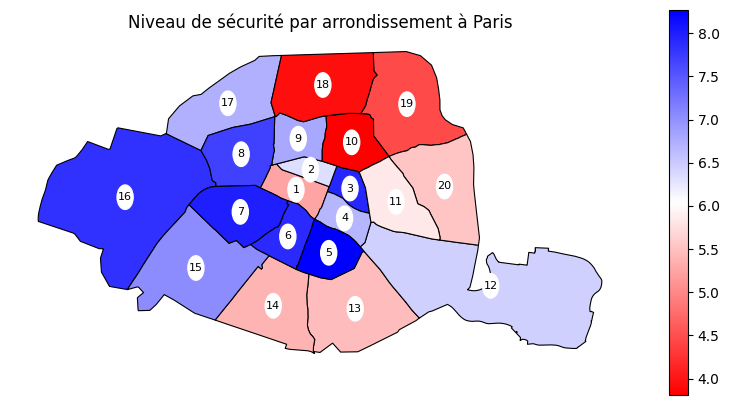

In [ ]:
data_securite = data.iloc[[2]].round(2)
data_securitee = data_securite.drop('Critere',axis=1)

# Transformation : convertir les colonnes en lignes
data_melted = data_securitee.melt(var_name='c_ar', value_name='note')

# Extraire le numéro d'arrondissement (1, 2, 3, ...) à partir du nom
data_melted['c_ar'] = data_melted['c_ar'].str.extract(r'(\d+)').astype(int)

gdf_merged2 = gdf.merge(data_melted, on='c_ar')

fig, ax = plt.subplots(figsize=(10, 5))
gdf_merged2.plot(column='note', cmap='bwr_r', linewidth=0.8, edgecolor='black', legend=True, ax=ax)

for idx, row in gdf_merged2.iterrows():
    # Calculer le centre du polygone pour placer le numéro
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y

    # Ajouter un cercle en arrière-plan
    circle = patches.Circle((x, y), radius=0.0035, color='white', zorder=1)  # Ajustez le rayon si nécessaire
    ax.add_patch(circle)

    # Ajouter le numéro de l'arrondissement
    ax.annotate(text=row['c_ar'], xy=(x, y), ha='center', va='center', fontsize=8, color='black', zorder=3)

plt.title('Niveau de sécurité par arrondissement à Paris')
plt.axis('off')
plt.show()

### Carte sur la note en relation avec l'acces aux commerces

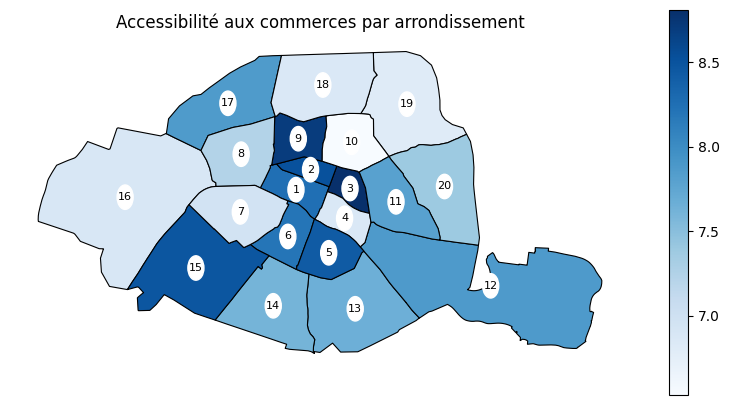

In [ ]:
data_com = data.iloc[[7]].round(2)
data_comerce = data_com.drop('Critere',axis=1)

# Transformation : convertir les colonnes en lignes
data_melted2 = data_comerce.melt(var_name='c_ar', value_name='note')

# Extraire le numéro d'arrondissement (1, 2, 3, ...) à partir du nom
data_melted2['c_ar'] = data_melted2['c_ar'].str.extract(r'(\d+)').astype(int)

gdf_merged3 = gdf.merge(data_melted2, on='c_ar')

fig, ax = plt.subplots(figsize=(10, 5))
gdf_merged3.plot(column='note', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
# ax.set_aspect('equal')
# Ajouter les numéros d'arrondissements avec un fond circulaire
for idx, row in gdf_merged3.iterrows():
    # Calculer le centre du polygone pour placer le numéro
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y

    # Ajouter un cercle en arrière-plan
    circle = patches.Circle((x, y), radius=0.0035, color='white', zorder=1)  # Ajustez le rayon si nécessaire
    ax.add_patch(circle)

    # Ajouter le numéro de l'arrondissement
    ax.annotate(text=row['c_ar'], xy=(x, y), ha='center', va='center', fontsize=8, color='black', zorder=3)

plt.title('Accessibilité aux commerces par arrondissement')
plt.axis('off')
plt.show()

### Loyer moyen par arrondissement

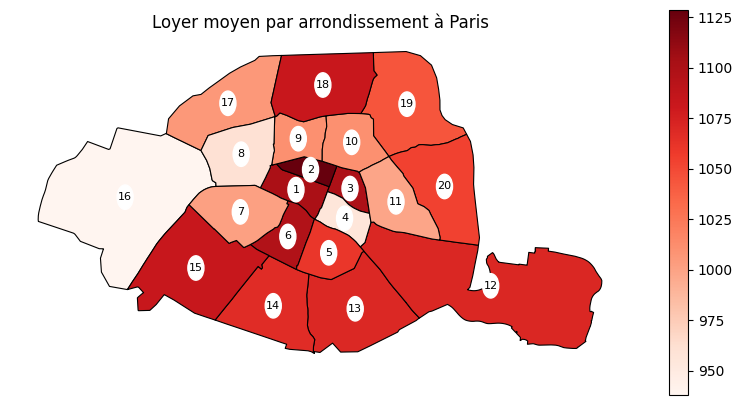

In [ ]:
# Calculer le loyer moyen par arrondissement
loyer_moyen = data_rent_merged.groupby('zipcode')['price'].mean().reset_index()
loyer_moyen.columns = ['c_ar', 'loyer_moyen']
loyer_moyen['loyer_moyen']=loyer_moyen['loyer_moyen'].round(2)
# Extraire le numéro d'arrondissement (1, 2, 3, ...) à partir du nom
loyer_moyen['c_ar'] = loyer_moyen['c_ar'] % 100

# Associer les données de loyer moyen au GeoDataFrame
gdf_merged7 = gdf.merge(loyer_moyen, on='c_ar')

# Tracer la carte
fig, ax = plt.subplots(figsize=(10, 5))
gdf_merged7.plot(column='loyer_moyen', cmap='Reds', linewidth=0.8, edgecolor='black', legend=True, ax=ax)

# Ajouter les numéros d'arrondissements
for idx, row in gdf_merged7.iterrows():
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y
    # Ajouter un cercle en arrière-plan
    circle = patches.Circle((x, y), radius=0.0035, color='white', zorder=1)  # Ajustez le rayon si nécessaire
    ax.add_patch(circle)
    ax.annotate(text=row['c_ar'], xy=(x, y), ha='center', va='center', fontsize=8, color='black', zorder=3)


# Ajouter un titre et masquer les axes
plt.title('Loyer moyen par arrondissement à Paris')
plt.axis('off')
plt.show()